In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_bokeh
# pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",parse_dates=['date'])
data.set_index('date', inplace=True)

In [17]:
plt.figure()
plt.rcParams.update({'font.size': 22}) # must set in top
plt.rcParams.update({'figure.figsize': (24,10)}) # must set in top

<Figure size 1728x720 with 0 Axes>

In [5]:
data[data['iso_code'] == "DEU"].head(20)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-27,DEU,Europe,Germany,1.0,1.0,NaN,NaN,NaN,NaN,0.012,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-28,DEU,Europe,Germany,4.0,3.0,NaN,NaN,NaN,NaN,0.048,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-29,DEU,Europe,Germany,4.0,0.0,NaN,NaN,NaN,NaN,0.048,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-30,DEU,Europe,Germany,4.0,0.0,NaN,NaN,NaN,NaN,0.048,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-01-31,DEU,Europe,Germany,5.0,1.0,NaN,NaN,NaN,NaN,0.060,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-02-01,DEU,Europe,Germany,8.0,3.0,NaN,NaN,NaN,NaN,0.095,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-02-02,DEU,Europe,Germany,10.0,2.0,1.429,NaN,NaN,NaN,0.119,...,28.2,33.1,NaN,8.0,81.33,0.947,-4767.9,-4.74,-5.22,-56.828048
2020-02-03,DEU,Europe,Germany,12.0,2.0,1.571,NaN,NaN,NaN,0.143,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2020-02-04,DEU,Europe,Germany,12.0,0.0,1.143,NaN,NaN,NaN,0.143,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN


In [6]:
interesting_colums = ["new_cases", "new_cases_smoothed", "new_cases_smoothed_per_million",
                      "new_deaths_smoothed", "new_deaths_smoothed", "new_deaths_smoothed_per_million", "total_cases_per_million", "total_deaths_per_million", "mortality_rate"]
country_codes = ["SVK", "CZE", "DEU", "SWE", "USA"]

data['mortality_rate'] = data['total_deaths_per_million'] / data['total_cases_per_million']

slovakia = data[data['iso_code'] == "SVK"][interesting_colums]
czech_republic = data[data['iso_code'] == "CZE"][interesting_colums]
germany = data[data['iso_code'] == "DEU"][interesting_colums]
sweden = data[data['iso_code'] == "SWE"][interesting_colums]
usa = data[data['iso_code'] == "USA"][interesting_colums]

countries_combined = pd.concat(
    [slovakia.add_prefix("SVK_"),
     czech_republic.add_prefix("CZE_"),
     germany.add_prefix("DEU_"),
     usa.add_prefix("USA_"),
     sweden.add_prefix("SWE_")],
    axis=1)


In [50]:
countries_combined['SVK_new_deaths'].idxmax()
countries_combined.loc['2021-01-04 00:00:00']

SVK_new_cases                             908.000000
SVK_new_cases_smoothed                   6537.286000
SVK_new_cases_smoothed_per_million       1199.663000
SVK_new_deaths                            204.000000
SVK_new_deaths_smoothed                    91.714000
SVK_new_deaths_smoothed_per_million        16.831000
SVK_total_cases_per_million             53228.781000
SVK_total_deaths_per_million              462.631000
SVK_mortality_rate                          0.008691
CZE_new_cases                            6233.000000
CZE_new_cases_smoothed                  10339.143000
CZE_new_cases_smoothed_per_million        964.063000
CZE_new_deaths                            110.000000
CZE_new_deaths_smoothed                   131.143000
CZE_new_deaths_smoothed_per_million        12.228000
CZE_total_cases_per_million             69626.585000
CZE_total_deaths_per_million             1125.455000
CZE_mortality_rate                          0.016164
DEU_new_cases                           12320.

In [7]:
countries_combined.tail()

,SVK_new_cases,SVK_new_cases_smoothed,SVK_new_cases_smoothed_per_million,SVK_new_deaths,SVK_new_deaths_smoothed,SVK_new_deaths_smoothed_per_million,SVK_total_cases_per_million,SVK_total_deaths_per_million,SVK_mortality_rate,CZE_new_cases,...,USA_mortality_rate,SWE_new_cases,SWE_new_cases_smoothed,SWE_new_cases_smoothed_per_million,SWE_new_deaths,SWE_new_deaths_smoothed,SWE_new_deaths_smoothed_per_million,SWE_total_cases_per_million,SWE_total_deaths_per_million,SWE_mortality_rate
date,,,,,,,,,,,,,,,,,,,,,
2022-03-14,4583.0,11372.286,2086.937,32.0,35.143,6.449,418908.771,3477.530,0.008301,0.0,...,0.012130,0.0,1515.857,149.196,0.0,40.857,4.021,242769.528,1751.744,0.007216
2022-03-15,12630.0,11197.571,2054.876,29.0,32.714,6.003,421226.513,3482.852,0.008268,10864.0,...,0.012143,3677.0,1353.000,133.167,76.0,46.429,4.570,243131.431,1759.224,0.007236
2022-03-16,13652.0,11096.714,2036.367,30.0,31.857,5.846,423731.803,3488.357,0.008232,10751.0,...,0.012160,1814.0,1302.286,128.176,63.0,34.857,3.431,243309.972,1765.425,0.007256
2022-03-17,13202.0,10886.000,1997.699,31.0,31.857,5.846,426154.512,3494.046,0.008199,8593.0,...,0.012173,1639.0,1229.714,121.033,57.0,35.000,3.445,243471.288,1771.035,0.007274
2022-03-18,10931.0,10680.429,1959.974,33.0,32.286,5.925,428160.469,3500.102,0.008175,8187.0,...,0.012178,1980.0,1301.429,128.091,59.0,36.429,3.585,243666.167,1776.842,0.007292


<AxesSubplot:title={'center':'Slovensko - Počet prípadov ochorenia'}, xlabel='date'>

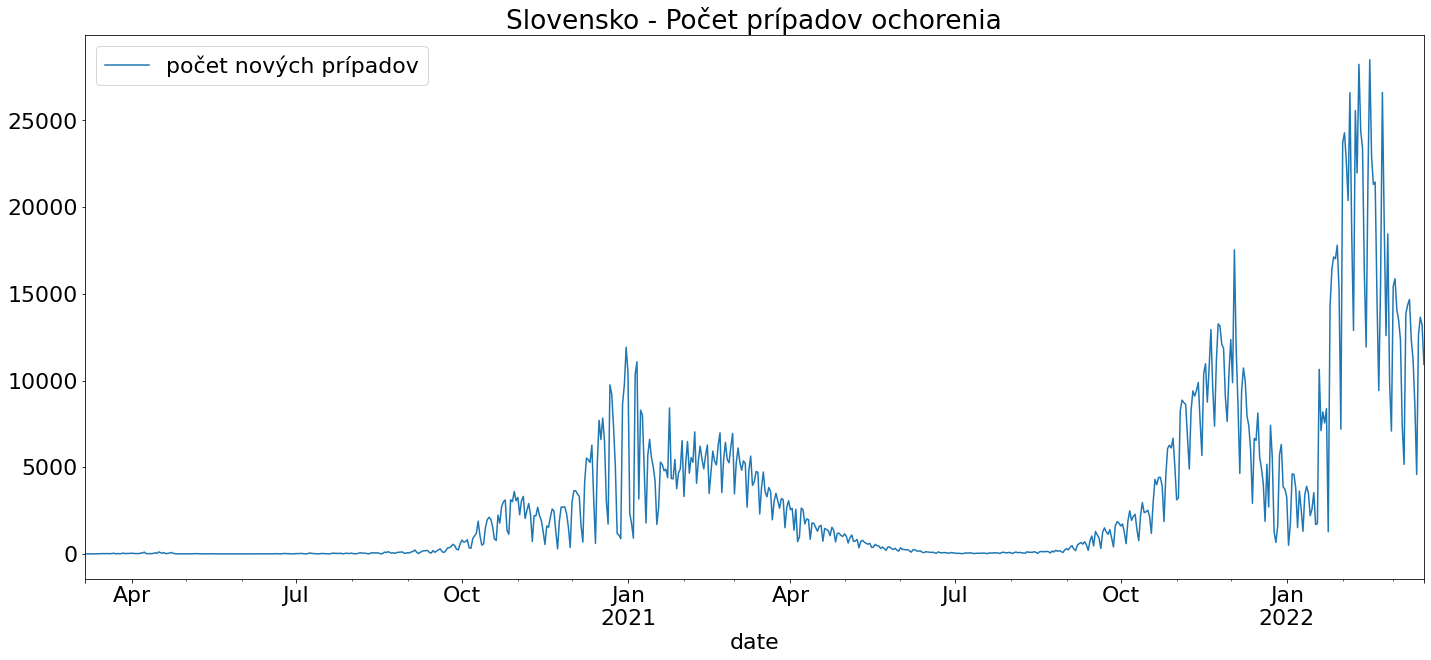

In [20]:
slovakia.plot(y=['new_cases'],
              title="Slovensko - Počet prípadov ochorenia",
              label=["počet nových prípadov"])


<AxesSubplot:title={'center':'Slovensko - Počet prípadov ochorenia (vyhladené)'}, xlabel='date'>

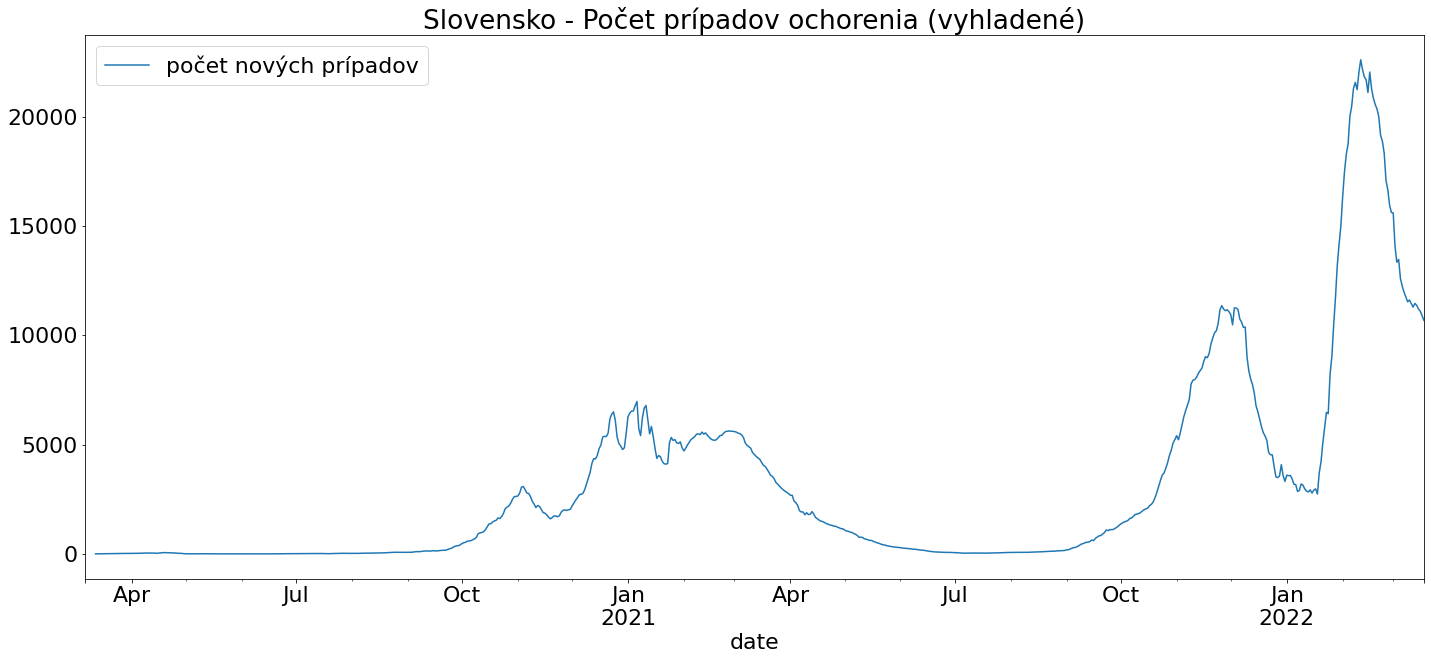

In [21]:
slovakia.plot(y=['new_cases_smoothed'],
              title="Slovensko - Počet prípadov ochorenia (vyhladené)",
              label=["počet nových prípadov"])


In [ ]:
slovakia[['new_cases_smoothed', 'new_deaths_smoothed']].plot(title="Slovensko - počet prípadov a úmrtí",
                                                             xlabel="Dátum",
                                                             ylabel="Počet nových prípadov",
                                                             number_format="1",
                                                             figsize=(
                                                                 1600, 600),
                                                             fontsize_title=20,
                                                             fontsize_label=15,
                                                             fontsize_ticks=15,
                                                             fontsize_legend=15,
                                                             )

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

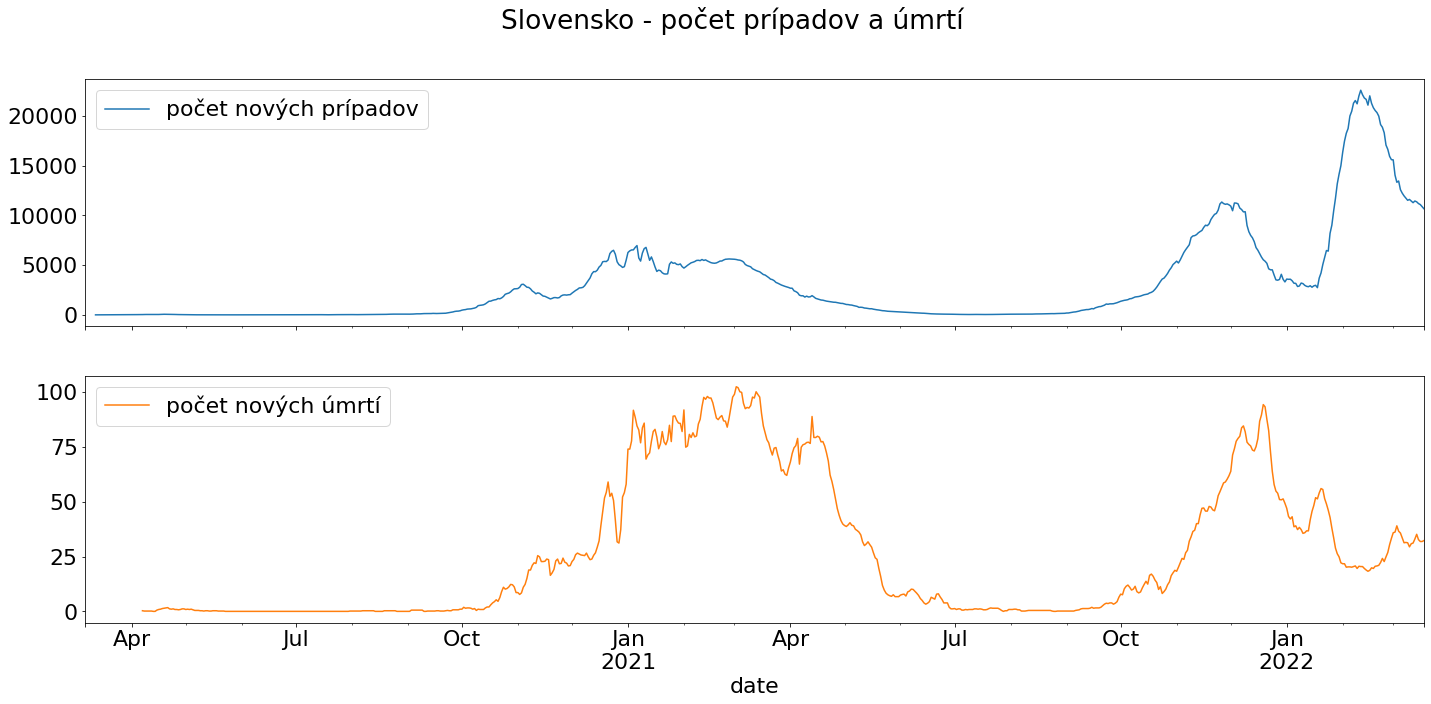

In [24]:
slovakia.plot(y=['new_cases_smoothed', 'new_deaths_smoothed'],
              title="Slovensko - počet prípadov a úmrtí",
              label=["počet nových prípadov", "počet nových úmrtí"], subplots=True)


In [52]:
slovakia['mortality_rate'].idxmax()

Timestamp('2020-05-16 00:00:00')

In [55]:
slovakia.loc['2020-05-16']['new_cases_smoothed']

5.429

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

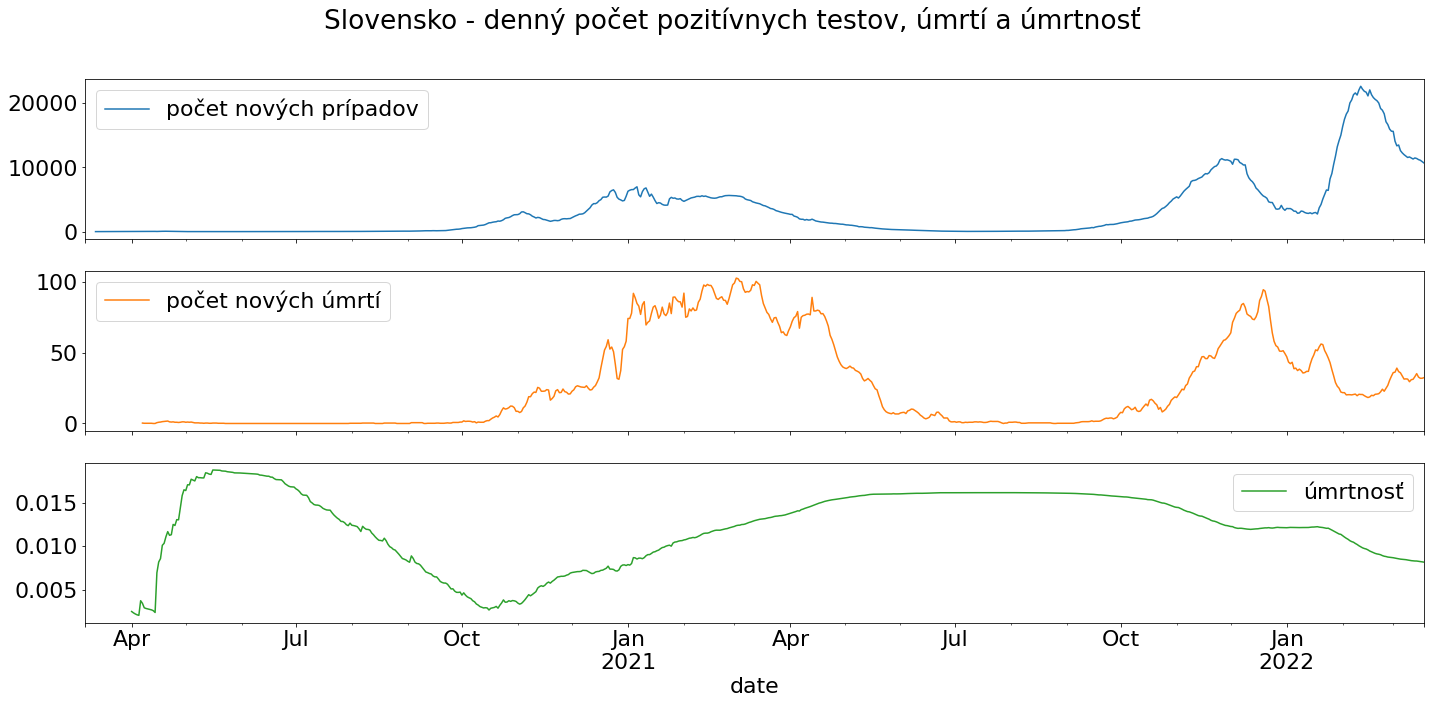

In [56]:
slovakia.plot(y=['new_cases_smoothed', 'new_deaths_smoothed', 'mortality_rate'],
              title="Slovensko - denný počet pozitívnych testov, úmrtí a úmrtnosť",
              label=["počet nových prípadov",
                     "počet nových úmrtí", 'úmrtnosť'],
              subplots=True)


<AxesSubplot:title={'center':'Slovensko - úmrtnosť'}, xlabel='date'>

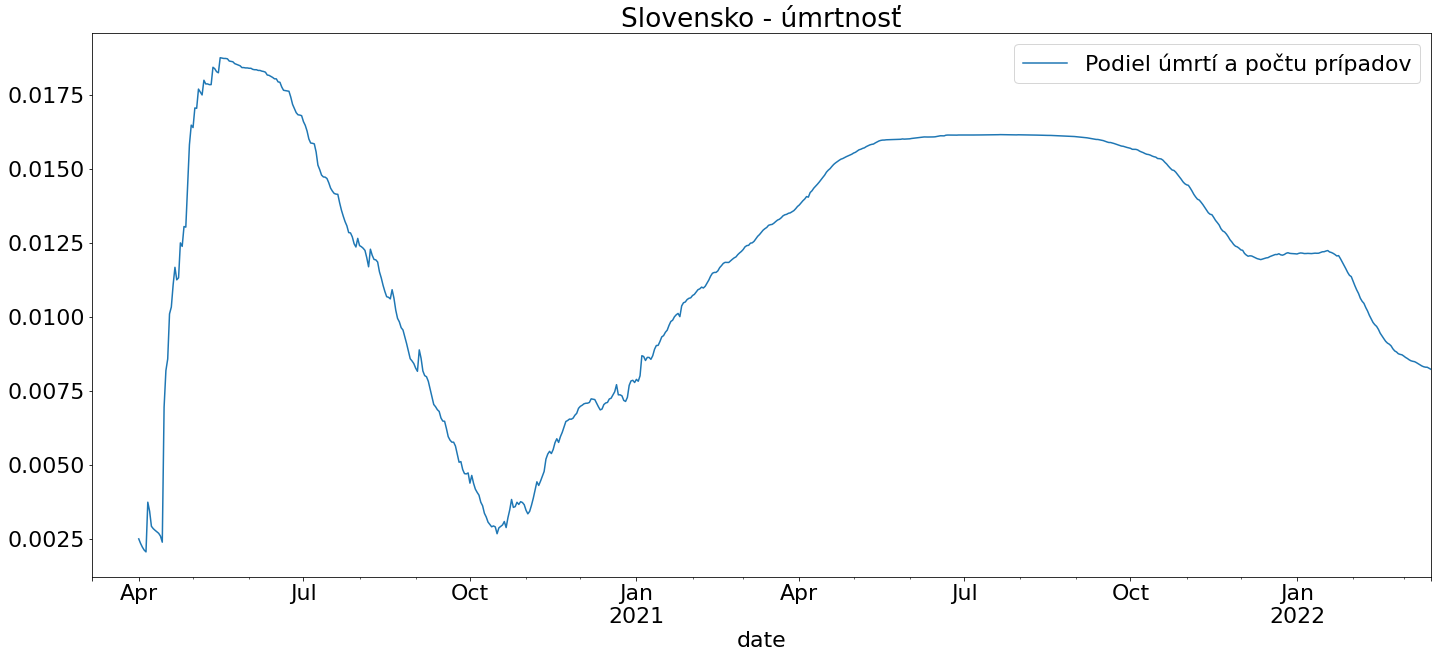

In [12]:
slovakia.plot( y = ['mortality_rate'], figsize=(24, 10),  title="Slovensko - úmrtnosť",label=["Podiel úmrtí a počtu prípadov"])


<AxesSubplot:title={'center':'Slovensko - počet prípadov a úmrtí'}, xlabel='date'>

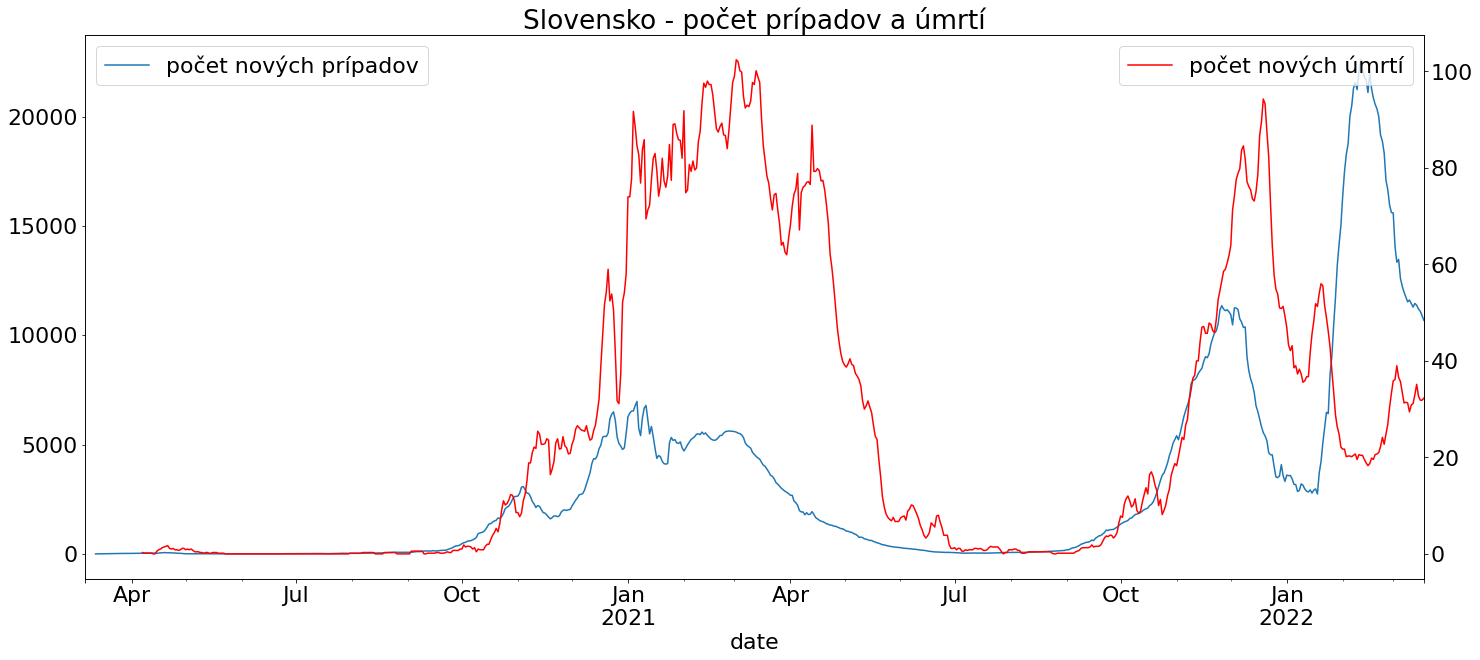

In [27]:
ax1 = slovakia.plot(y=['new_cases_smoothed'], label=["počet nových prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
slovakia.plot(y=['new_deaths_smoothed'], color="red", ax=ax2,
              title="Slovensko - počet prípadov a úmrtí", label=["počet nových úmrtí"])


<AxesSubplot:title={'center':'Cases in several countries'}, xlabel='date'>

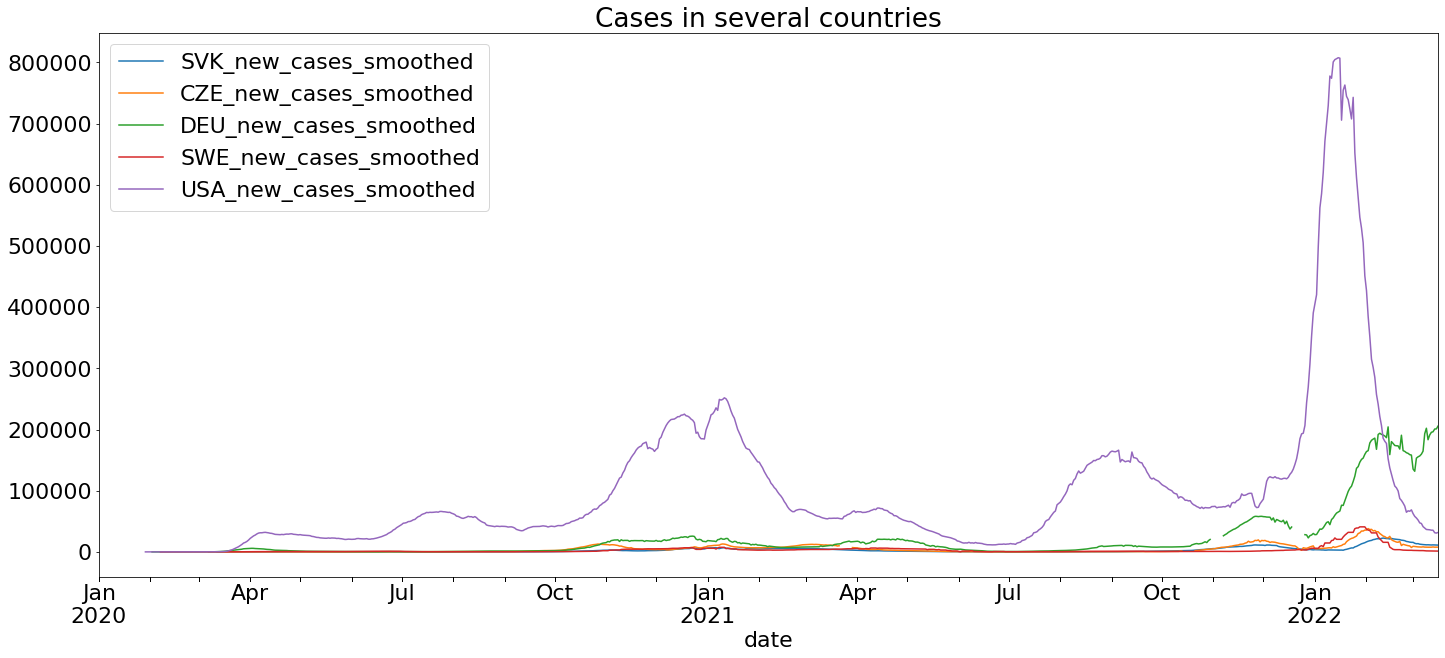

In [14]:
countries_combined.plot( 
    y = [ code + "_new_cases_smoothed" for code in country_codes 
    ], 
    figsize=(24, 10), 
    xticks=countries_combined.index.strftime('%m-%Y'),
    title="Cases in several countries"
    )

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

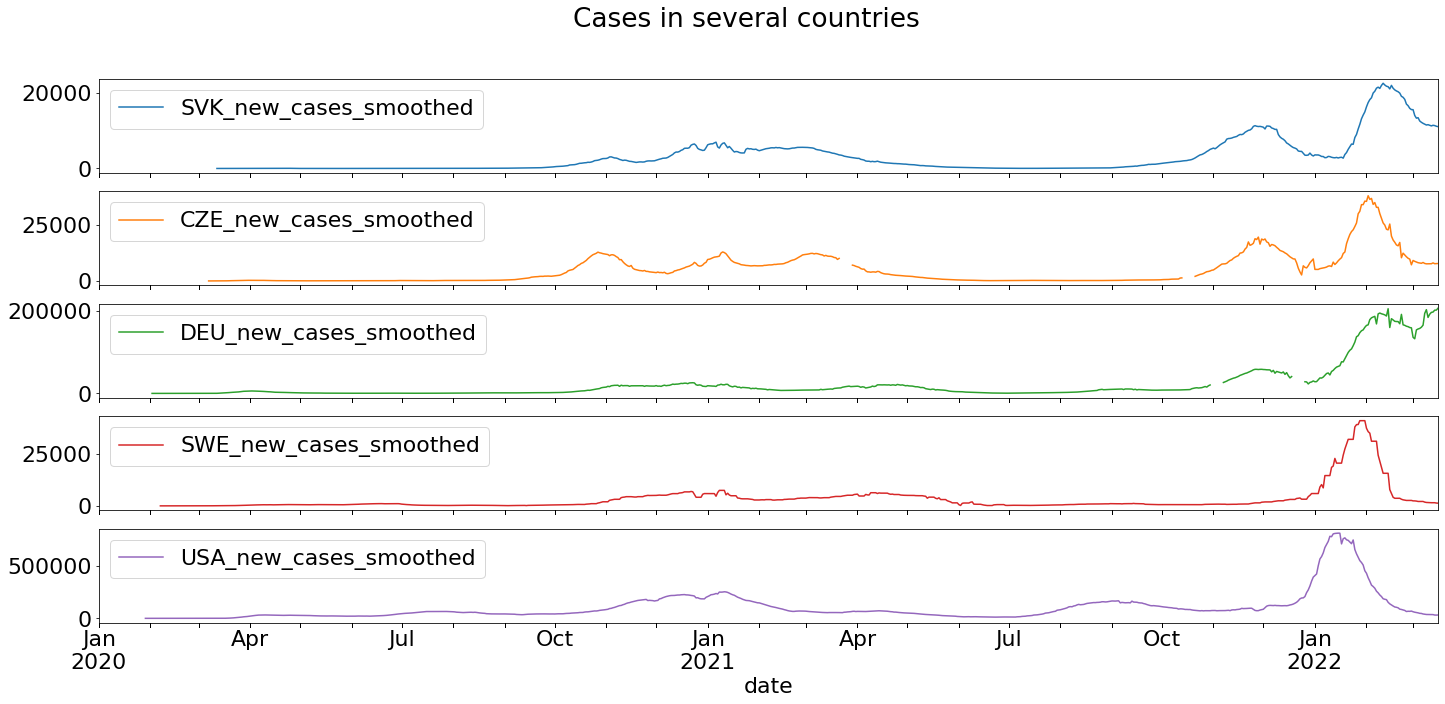

In [15]:
countries_combined.plot(
    y=[ code + "_new_cases_smoothed" for code in country_codes    ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=True,
    title="Cases in several countries"
)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

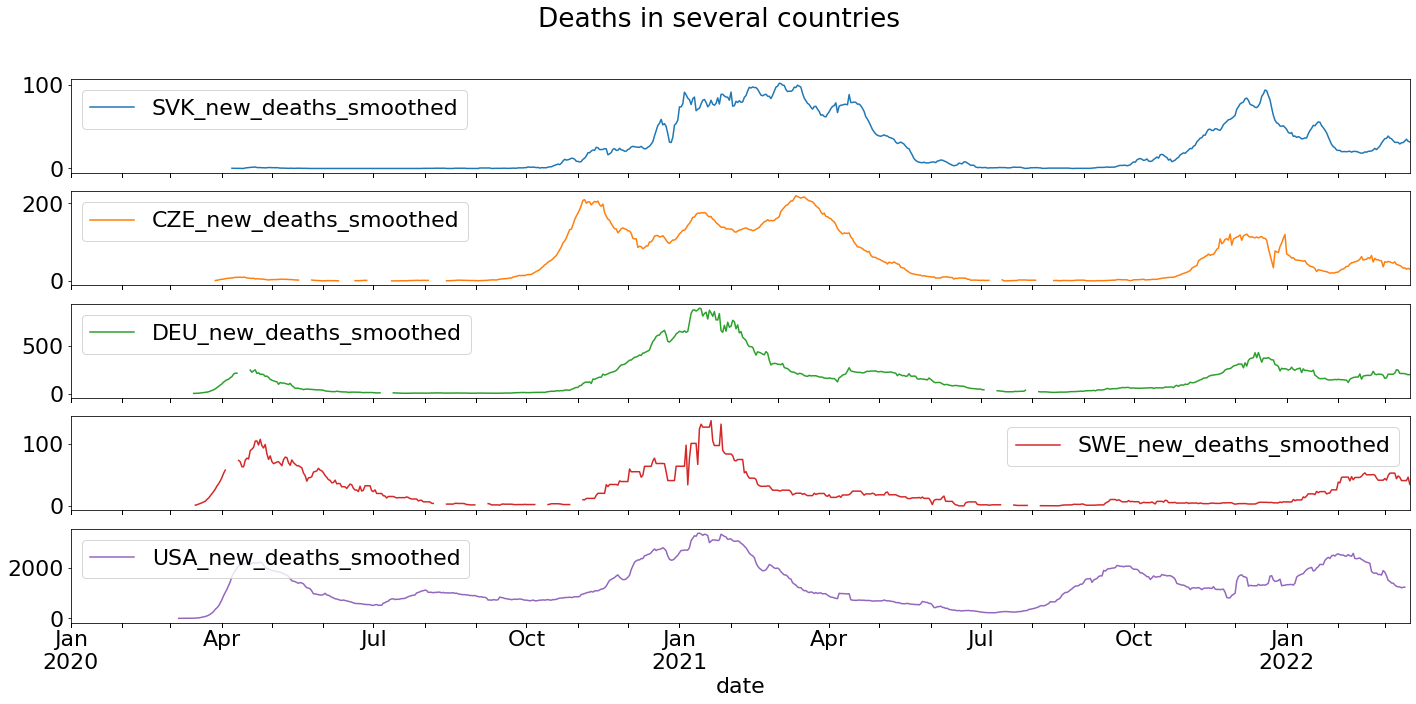

In [16]:
countries_combined.plot(
    y=[code + "_new_deaths_smoothed" for code in country_codes],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=True,
    title="Deaths in several countries"
)


<AxesSubplot:title={'center':'Cases in several countries'}, xlabel='date'>

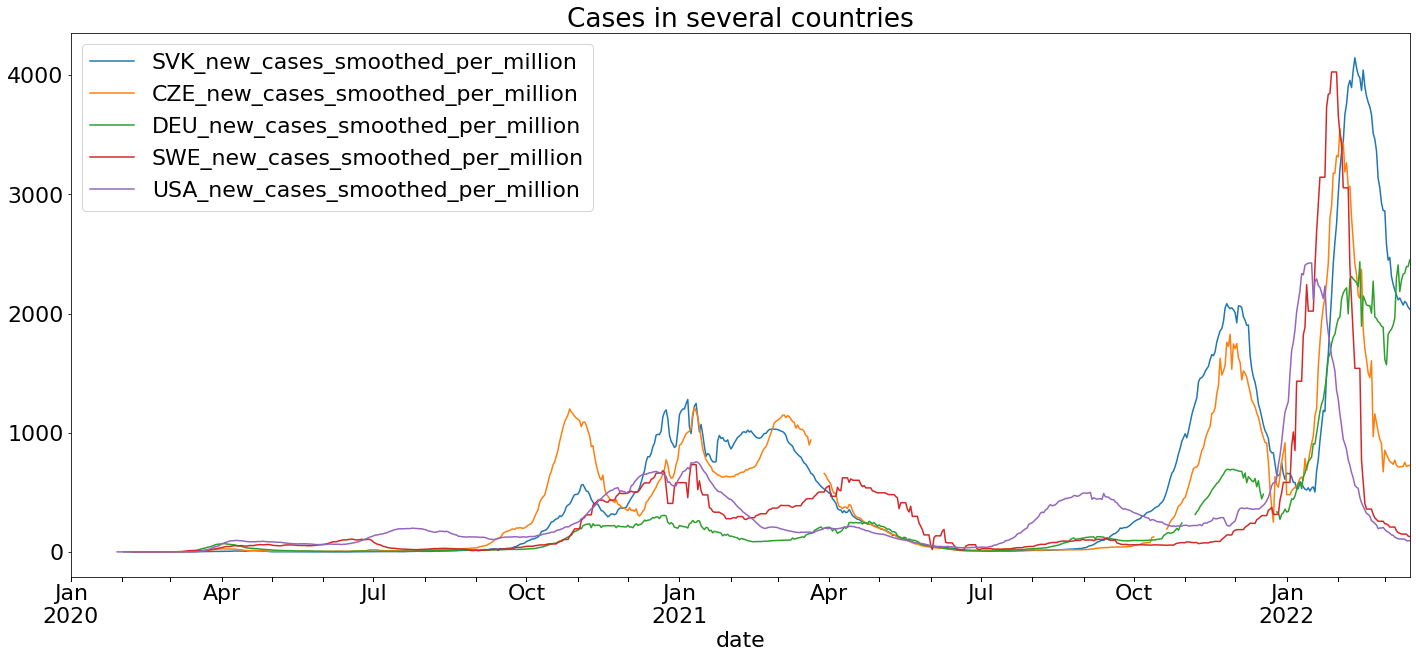

In [17]:
countries_combined.plot(
    y=[code + "_new_cases_smoothed_per_million" for code in country_codes],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Cases in several countries"
)


<AxesSubplot:title={'center':'Deaths per million in several countries'}, xlabel='date'>

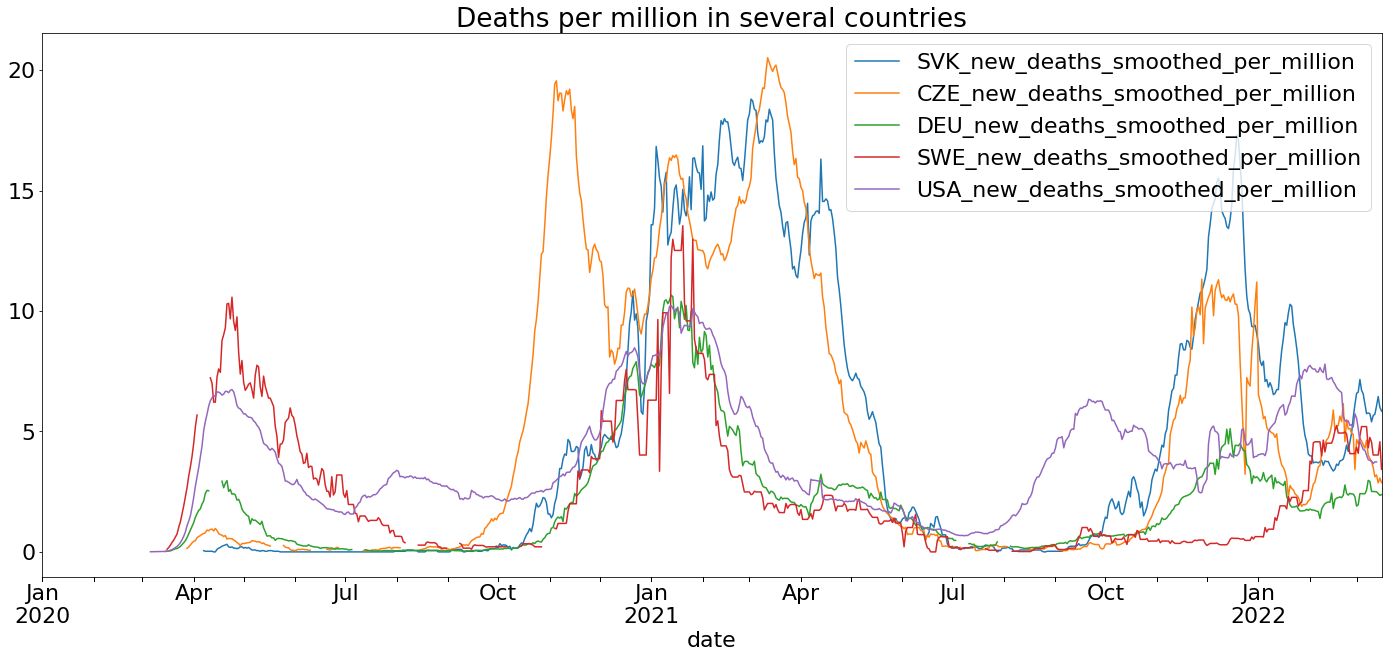

In [18]:
countries_combined.plot(
    y=[ code + "_new_deaths_smoothed_per_million" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Deaths per million in several countries"
)



<AxesSubplot:title={'center':'Celkový počet úmrtí na milión obyvateľov vo viacerých krajinách'}, xlabel='date'>

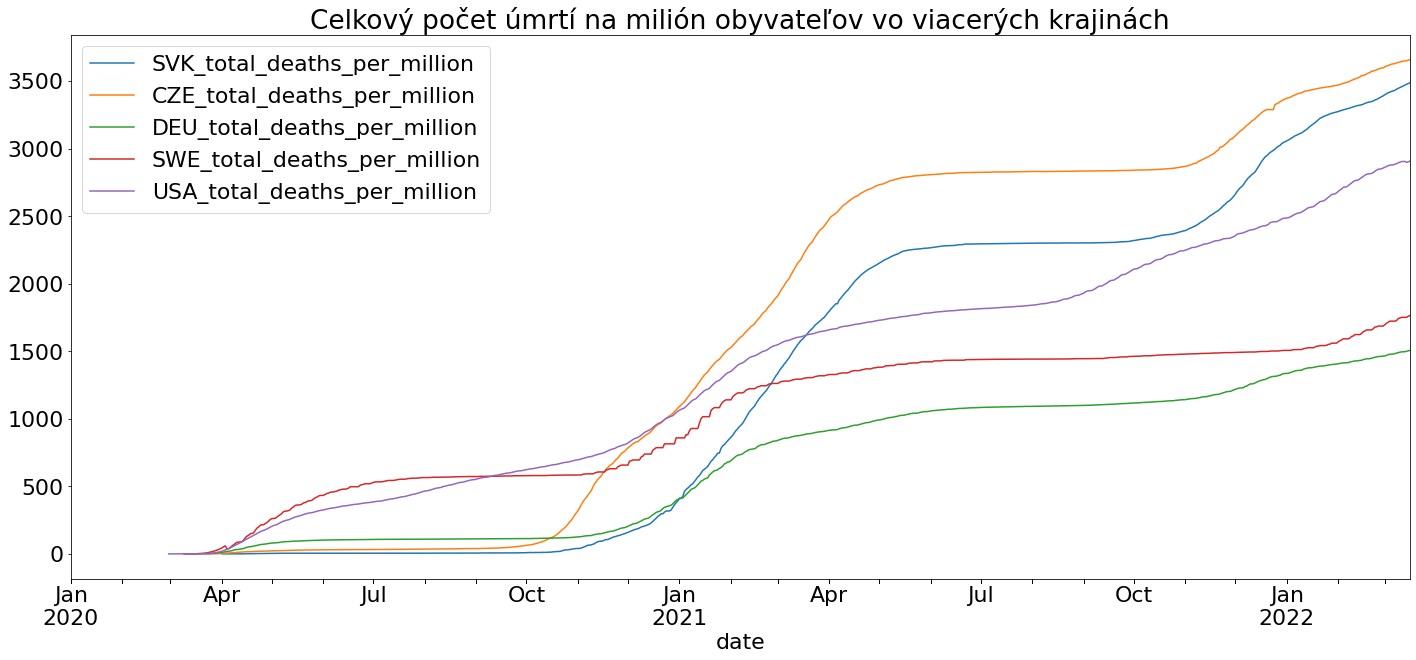

In [19]:
countries_combined.plot(
    y=[ code + "_total_deaths_per_million" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Celkový počet úmrtí na milión obyvateľov vo viacerých krajinách"
)



<AxesSubplot:title={'center':'Celkový počet prípadov na milión obyvateľov vo viacerých krajinách'}, xlabel='date'>

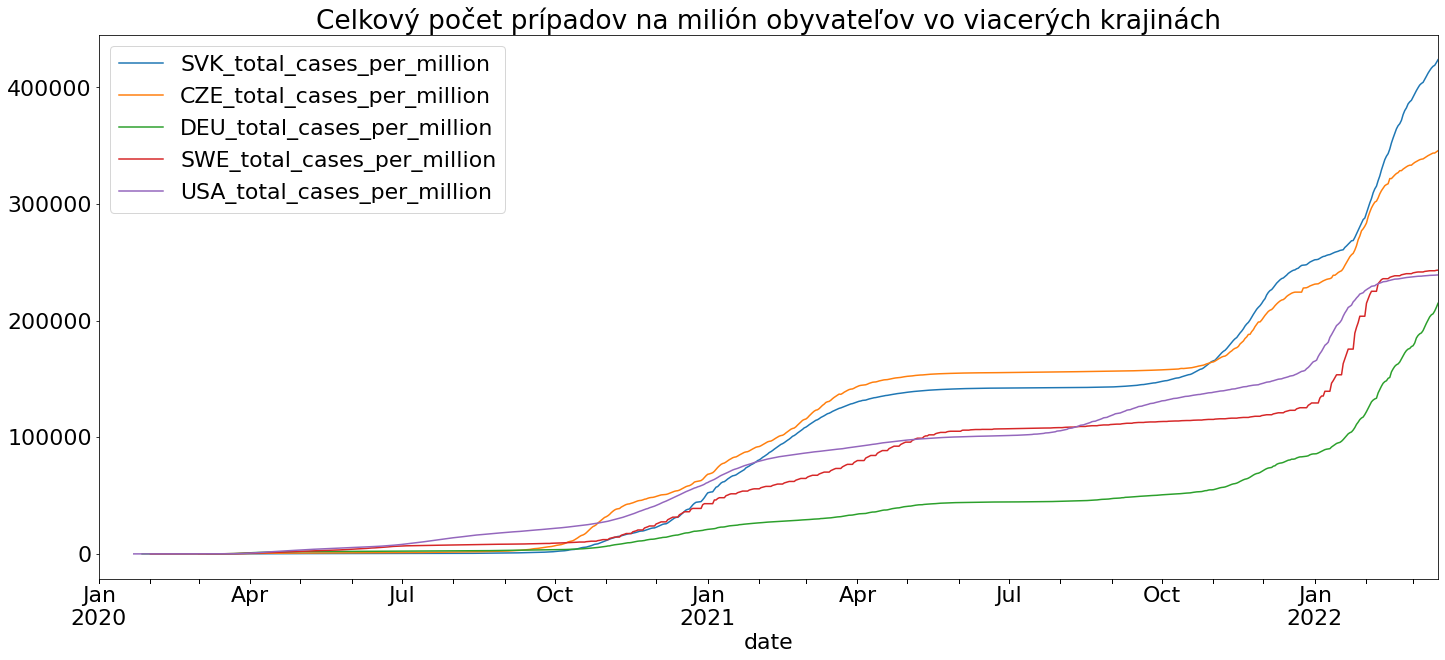

In [20]:
countries_combined.plot(
    y=[ code + "_total_cases_per_million" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Celkový počet prípadov na milión obyvateľov vo viacerých krajinách"
)



<AxesSubplot:title={'center':'Úmrtnosť - počet celkových úmrtí / počet celkových prípadov'}, xlabel='date'>

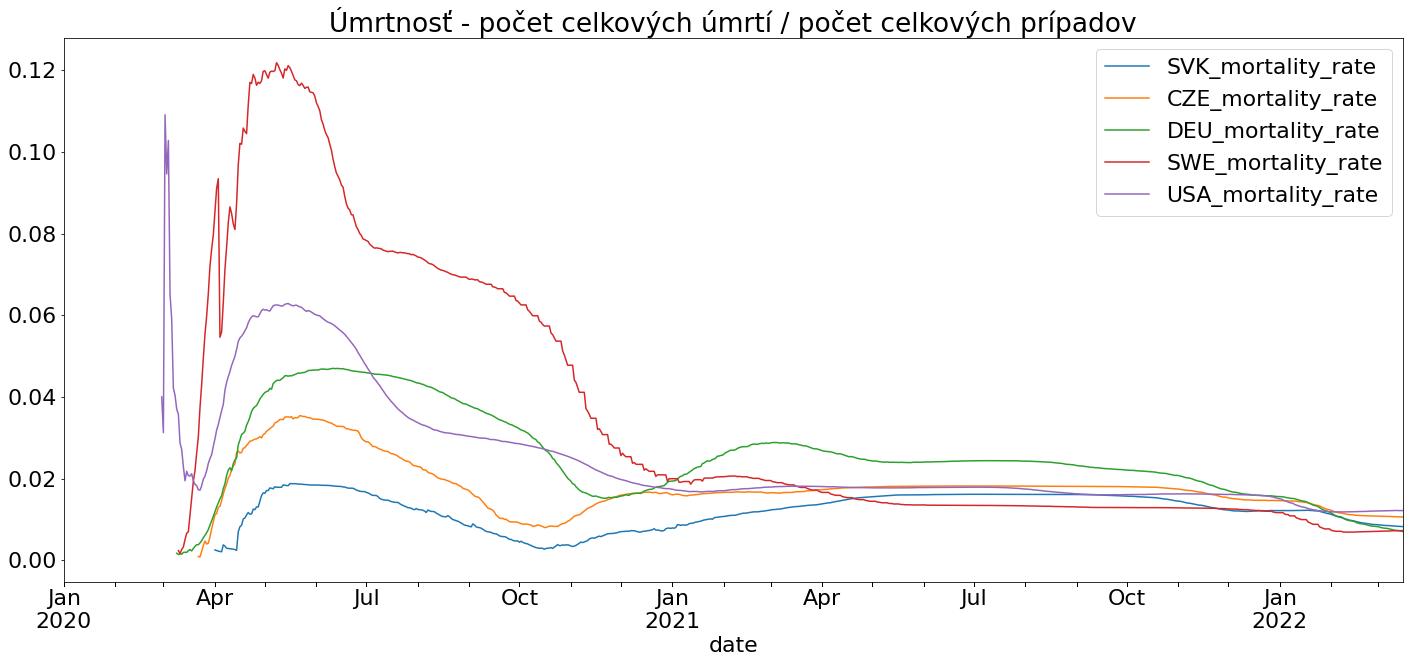

In [21]:
countries_combined.plot(
    y=[ code + "_mortality_rate" for code in country_codes ],
    figsize=(24, 10),
    xticks=countries_combined.index.strftime('%m-%Y'),
    subplots=False,
    title="Úmrtnosť - počet celkových úmrtí / počet celkových prípadov"
)

